# Code-HotSpots

Welche Dateien werden wie oft geändert?

## Input
Git-Versionskontrollsystemdaten einlesen.

In [1]:
from ozapfdis import git

log = git.log_numstat_existing("../../../dropover/")
log.head()

,additions,deletions,file,sha,timestamp,author
0,191.0,0.0,backend/pom-2016-07-16_04-40-56-752.xml,8c686954,2016-07-22 17:43:38,Michael
1,1.0,1.0,backend/src/test/java/at/dropover/scheduling/i...,97c6ef96,2016-07-16 09:51:15,Markus
2,55.0,0.0,backend/src/test/java/at/dropover/scheduling/i...,432113a2,2016-07-15 21:17:07,Chris
3,19.0,3.0,backend/src/main/webapp/app/widgets/gallery/js...,3f7cf92c,2016-07-16 09:07:31,Markus
4,24.0,11.0,backend/src/main/webapp/app/widgets/gallery/js...,bf2b00ba,2014-10-26 05:52:48,Michael


## Bereinigen
Nur Produktions-Code ausgewerten.

In [2]:
java_prod = log[log['file'].str.contains("backend/src/main/java/")].copy()
java_prod = java_prod[~java_prod['file'].str.contains("package-info.java")]
java_prod.head()

,additions,deletions,file,sha,timestamp,author
9,3.0,4.0,backend/src/main/java/at/dropover/files/intera...,ec85fe73,2016-07-16 08:12:29,Chris
10,68.0,6.0,backend/src/main/java/at/dropover/files/intera...,0732e9cb,2016-07-16 00:27:20,Chris
11,6.0,6.0,backend/src/main/java/at/dropover/files/intera...,a526cce1,2016-07-15 16:40:07,Chris
12,1.0,1.0,backend/src/main/java/at/dropover/files/intera...,ad06aa87,2014-12-04 08:16:02,Markus
13,3.0,5.0,backend/src/main/java/at/dropover/files/intera...,b5dd5695,2014-08-13 15:46:28,Chris


## Aggregation
HotSpots ermitteln

In [3]:
hotspots = java_prod['file'].value_counts()
hotspots.head()

backend/src/main/java/at/dropover/framework/dependencyinjection/GuiceConfig.java                       31
backend/src/main/java/at/dropover/scheduling/entity/gateway/inmemory/InMemorySchedulingGateway.java    24
backend/src/main/java/at/dropover/scheduling/entity/gateway/aws/DynamoDbSchedulingGateway.java         23
backend/src/main/java/at/dropover/scheduling/interactor/validation/SchedulingRequestValidator.java     21
backend/src/main/java/at/dropover/scheduling/entity/gateway/SchedulingGateway.java                     21
Name: file, dtype: int64

## Visualisierung 
TOP 10 Hotspots anzeigen.

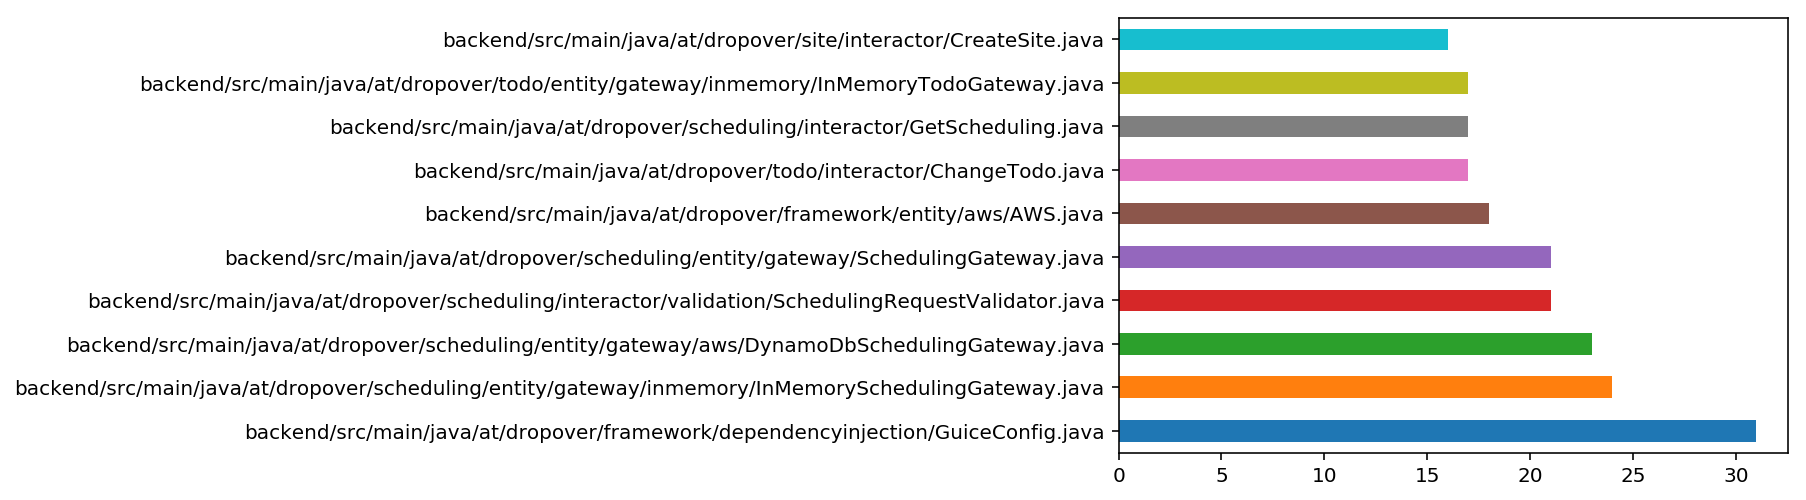

In [4]:
hotspots.head(10).plot.barh();